<a href="https://colab.research.google.com/github/satyhim/Projects/blob/main/NLP_Sentiment_Analysis_Tweeter_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis : Tweeter Data

#Problem Statement:

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiments associalted with it. so the task is to classify racist or sexist tweets from the other tweets.


Formally, given a training sample of tweets and label, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.

In [10]:
import pandas as pd
import numpy as np
import re
import nltk
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
df_train=pd.read_csv('/content/drive/MyDrive/Python/Project/Sentiment_analysis/Train_tweets.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Python/Project/Sentiment_analysis/Test_tweets.csv')


In [21]:
df_train.shape

(31962, 3)

In [20]:
df_train.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [22]:
df_test.shape

(17197, 2)

In [23]:
df_test.columns

Index(['id', 'tweet'], dtype='object')

In [24]:
df_train.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [25]:
df_test.isna().sum()

id       0
tweet    0
dtype: int64

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [27]:
df_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [28]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [31]:
df_train['label'].unique()

array([0, 1])

Now we will check out some non racist/sexist tweets : 

In [36]:
df_train[df_train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


Now we will check out some racist/sexist tweets :

In [37]:
df_train[df_train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


Now we can see there are many words and characters which are not required in the tweets for our analysis.

Lets check label distribution in the dataset:

In [39]:
df_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

So we can see there are 29720 tweets are non racist/sexist and only 2242 tweets are racist/sexist tweets.

Checking length disrtibution of words in the tweets in both train and test data:

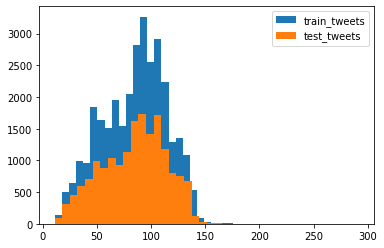

In [43]:
length_train=df_train['tweet'].str.len()
length_test=df_test['tweet'].str.len()
plt.hist(length_train, bins=40, label="train_tweets")
plt.hist(length_test, bins=40, label="test_tweets")
plt.legend()
plt.show()